# Presentation: https://drive.google.com/file/d/11bvnVR5bs_6mFZB9NjgkVNKG-9ey-tnP/view?usp=drive_link


# **When Data Attacks**
- Natalie Belford
- Ashley Dosch
- Nathan Farmer


# **IDC6210 Kaggle Group Capstone Project**
# **Project Details**

# Description
Telecon Customer Churn Prediction


# Goal
Use historical customer data to develop machine learning models that can predict customer churn effectively.


# File Path
kaggle competitions download -c uwf-ml-for-ds-fall-2023-capstone-project


# Task
Build predictive models that can accurately predict whether a Telecon customer will churn or not based on historical customer data


# Competition Description
Customer churn is a critical issue for telecommunication companies. 
Losing customers to churn can lead to significant revenue loss and impact the company's growth. 
Therefore, it is essential to predict potential churners accurately and take proactive measures to retain them. 


# Dataset
Dataset consists of various customer attributes, such as customer demographics, subscription details, service usage, and billing information. 
Dataset is divided into two parts: training data (train.csv) and testing data (test.csv). 
Participants are required to build their predictive models using training data and submit predictions for testing data.


# Target Variable
"Churn" column indicates whether the customer churned (1) or not (0).


# File Descriptions

- train.csv: Contains the training set data.
- test.csv: Contains the test set data.
- sample_solution.csv: Contains a sample solution file in the correct format, demonstrating the ground truth data for scoring the submissions.

Column Definitions:
- ID: Unique identifier for each customer data instance.
- gender: Categorical variable representing the gender of the customer.
- SeniorCitizen: Binary variable indicating if the customer is a senior citizen (1) or not (0).
- Partner: Categorical variable indicating if the customer has a partner or not.
- Dependents: Categorical variable indicating if the customer has dependents or not.
- tenure: Continuous variable representing the number of months the customer has been with the company.
- PhoneService: Categorical variable indicating if the customer has phone service or not.
- MultipleLines: Categorical variable indicating the type of phone service the customer has (e.g., single line, multiple lines).
- InternetService: Categorical variable indicating the type of internet service the customer has (e.g., DSL, fiber optic).
- OnlineSecurity: Categorical variable indicating if the customer has online security or not.
- OnlineBackup: Categorical variable indicating if the customer has online backup or not.
- DeviceProtection: Categorical variable indicating if the customer has device protection or not.
- TechSupport: Categorical variable indicating if the customer has tech support or not.
- StreamingTV: Categorical variable indicating if the customer has streaming TV or not.
- StreamingMovies: Categorical variable indicating if the customer has streaming movies or not.
- Contract: Categorical variable representing the type of contract the customer has (e.g., month-to-month, one year, two year).
- PaperlessBilling: Categorical variable indicating if the customer has opted for paperless billing or not.
- PaymentMethod: Categorical variable representing the payment method used by the customer.
- MonthlyCharges: Continuous variable representing the monthly charges for the customer.
- TotalCharges: Continuous variable representing the total charges for the customer.
- Churn: Target variable column indicating if the customer churned (1) or not (0).


# Evaluation Metric
Submissions evaluated based on Area Under the Receiver Operating Characteristic Curve (AUC). 
AUC: commonly used metric to evaluate performance of binary classification models
Measures trade-off between true positive rate (sensitivity) and false positive rate (1-specificity)


# Current Benchmark
AUC score of 0.72177


# Submission Format
For each ID in the testing data, predict probability of customer churn
Submission file (submission.csv) should have two columns: 'ID' and 'Churn'
'Churn' column should contain the predicted probabilities for customer churn


# Deliverables
- Submission csv
beat benchmark AUC: 40% of grade: ability to achieve an AUC score higher than the current benchmark of 0.72177.

- Video
Video should be hosted on Google Drive or YouTube; 15 minutes long.
Video should be in format of:
     - explaining the problem
     - findings
     - proposed solution to a technical manager
     - participants should provide suggestions based on their analysis

- Notebook.md
Complete Notebook with Visualization and Report: 30% of grade: quality of Jupyter Notebook (ipynb) report
Notebook should serve as report.
Include:
     - information and visualizations about problem 
     - data exploration
     - modeling process
Justify choices of models, features, and hyperparameters
Hyperparameter tuning is encouraged to improve model performance

- Presentation Link
Include link to presentation video within first line of Jupyter Notebook


# Submission Details

Download final Notebook from Kaggle and upload in Canvas

Submission should be one per group of 3 by group leader within Kaggle 

Group leader should be identified in Canvas Discussion Thread

# Import Libraries and Packages

- To begin the project, we want to import the libraries we will be using throughout the analysis.

In [29]:
import numpy as np # linear algebra import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pathlib #enables deletion of old files
import os
import pandas as pd
import matplotlib.pyplot as plt

from termcolor import colored #provides depth to the code with colored output
from sklearn.compose import ColumnTransformer #modify individual columns
from sklearn.preprocessing import OneHotEncoder 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, auc
import warnings

# Warnings gained on some deprecated code, seemingly in Kaggle. Warnings ignored to make the 
# code more friendly to source control and collaborative development.
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.linear_model._logistic')



# ****Project Tasks****

# 1. **Data Exploration:** Start by exploring the dataset, understanding the features, and identifying any missing values or inconsistencies. 


---
***Explanations and Rationale***  
Throughout the several runs of the notebook, I found it challenging to keep track of the most recent file to be created. The solution is the `os.remove()` function. Having this file at the beginning of the code ensures that the folder is empty when the code begins, so the only files in the "/kaggle/working" folder by the end of execution will be those files created during the current run.

In order for us to implement this, we must specify which files we want to delete. Since this notebook only creates `.csv` files, it is designed to delete only `.csv` files. If you want to adapt this code to delete **all** files, you change the value of `files_to_delete` to `./*`.

This was not used in production, it was purely utilized for testing. It is commented out for the final notebook submission.

***Explanation of code***
* `.glob()`: used to find all the pathnames matching the pattern passed as a parameter and make them into a list. 
* `.getcwd()`: "Get current working directory" this is where your files are being saved
* `pathlib.Path()`: simply returns a nicely formatted path to the path parameters you pass.
* `remove()`: deletes the file
* `colored()`: Colored allows us to add depth to our print statements. By switching colors between "blue" and "green" on alternating statements, we can more easily read the console and determine where one statement ends and the next begins. This is particularly helpful with multiline prints. Colored takes in two parameters: the string to be printed and the color to be displayed. 

***Notes:***
This is a great approach to keep your outputs clean and relevant to only the most recent run. However, it should be noted that deleted files cannot be recovered, so use it cautiously. 

In [2]:
# # Delete old kaggle output files
# files_to_delete = './*.csv'
# files_list = pathlib.Path(os.getcwd()).glob(files_to_delete)
# for file_path in files_list:
#     os.remove(file_path)
    
# print(colored("Output files cleaned.", "blue"))

In [2]:
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#        print(os.path.join(dirname, filename))

---

***Explanations and Rationale***

The initial task is to import the datasets from the paths provided by Kaggle. The paths for this notebook are `/kaggle/input/churn-ds/train.csv` and `/kaggle/input/churn-ds/test.csv`.

The purpose of the code is to read the train dataset from its CSV file and store it in a DataFrame for future operations. After that, the code prints the DataFrame contents in blue to visually validate the imported data.

***Explanation of Code***

- `pd.read_csv()`: This Pandas method reads a .csv file from the provided filepath and converts it into a DataFrame.

***Notes:*** Upon visual inspection of the printed DataFrame, no missing values are easily apparent.

In [3]:
#import the dataset
raw_train_df = pd.read_csv('/kaggle/input/assignment-data/train.csv')
#raw_train_df = pd.read_csv('./train.csv')
#validate df contents
print(colored(raw_train_df, 'blue'))

        ID  customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     3739  4950-BDEUX    Male              0      No         No      35   
1     3152  7993-NQLJE    Male              0     Yes        Yes      15   
2     4861  7321-ZNSLA    Male              0     Yes        Yes      13   
3     3868  4922-CVPDX  Female              0     Yes         No      26   
4     3811  2903-YYTBW    Male              0     Yes        Yes       1   
...    ...         ...     ...            ...     ...        ...     ...   
5629  6304  6308-CQRBU  Female              0     Yes         No      71   
5630  6228  2842-JTCCU    Male              0      No         No       2   
5631  4674  6402-ZFPPI  Female              1      No         No      25   
5632  2711  3594-BDSOA  Female              0     Yes         No      24   
5633  5640  6490-FGZAT    Male              0      No         No       6   

     PhoneService     MultipleLines InternetService  ...     DeviceProtection  \
0     

---
***Explanations and Rationale***  
Now, we are getting to know our data. Glancing at the small subset of values in the previous command must be more extensive to verify that the dataset contains all the values. 
We obtain a list of the missing values in each row with the first `.isnull().sum()` command. We can then sum this entire list to get a total count of all the dataset's missing values. 

***Explanation of code***
* `isnull()`: This method creates a boolean table the same size as the data frame it was called on. Elements with `True` are those with a missing value. 
* `sum()`: This method adds up all the values. If you do not specify a dimension, then it will reduce the dimensions; so, a 2D matrix returns a 1D vector that is the sum of every column in that matrix. Calling sum on the subsequent vector would reduce the 1D vector would result is a single scaler.

***Notes:***
Our data is good to go! (Or is it?)

In [4]:
#check for missing features
missing_features_per_col = raw_train_df.isnull().sum()
total_missing_features = missing_features_per_col.sum()

print(colored(f'Total Missing Training Values: {total_missing_features}', 'blue'))

Total Missing Training Values: 0


# 2. **Preprocessing and Feature Engineering:** Perform necessary preprocessing steps such as handling missing data, encoding categorical variables, and scaling features. Consider feature selection techniques to enhance model performance.

---

***Explanations and Rationale***

This code block focuses on feature selection by removing uninformative or redundant columns from the DataFrame. Specifically, it eliminates the `ID` and `customerID` columns to reduce noise and improve the effectiveness of any subsequent machine learning model. `ID` and `customerID` are administrative numbers for identifying users, but it doesn't hold any information that can help make classifications; as such, they are omitted.

***Explanation of Code***

- `.drop()`: Drops the specified columns from the DataFrame. 
 - `columns=[]` tells which columns to drop

***Notes:***
We validate the output to ensure our intended columns have been dropped. 

In [5]:
#before drop
print(colored(raw_train_df.columns, 'blue'))

cleaned_train_df = raw_train_df.drop(columns=['ID', 'customerID'])

#after drop
print(colored(cleaned_train_df.columns, 'green'))

Index(['ID', 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


---

***Explanations and Rationale***

There is a need to identify values in the "TotalCharges" column that are non-numerical to contain a numerical value. If this is not done, then the algorithms will not work correctly. Beyond this, the columns are divided into both numerical value and one hot encoded value vectors. Encoding is used to transform any categorical values into numerical for processing via algorithms.

***Explanation of Code***

"check_numeric" is a custom function called twice to both identify and clean non-numeric values found in the given column. In this case, a non-numeric value has been identified as whitespace and turned into "0". Numerical values and categorical values are placed into their own arrays and checked for shape sizes. The OneHotEncoder library is used to transform categorical values to numerical values. Train_test_split is used to split the processed input data into test and train data.

***Notes:*** The multicolored displays show the difference in count before and after categorizing columns into numerical and one hot encoded candidates. It also displays the end result of splitting the data for training and testing to determine if it was stratified and split as expected.

In [6]:
# Check if any non-numeric values are present by attempting to cast to float
def check_numeric(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

non_numerics = cleaned_train_df['TotalCharges'].apply(lambda x: not check_numeric(str(x).strip())).sum()
print(f"TotalCharges has non-numeric values: {non_numerics}")

# Replace cells with only whitespace in 'TotalCharges' with 0
cleaned_train_df['TotalCharges'] = cleaned_train_df['TotalCharges'].apply(lambda x: 0 if str(x).strip() == '' else x)

# Check again
non_numerics = cleaned_train_df['TotalCharges'].apply(lambda x: not check_numeric(str(x).strip())).sum()
print(f"TotalCharges has non-numeric values: {non_numerics}")

TotalCharges has non-numeric values: 8
TotalCharges has non-numeric values: 0


In [7]:
X = cleaned_train_df.iloc[:, :-1]

#split X into numerical values and OHE values
NUMERICAL_FEATURES = [1, 4, 17, 18]
OHE_FEATURES = [0, 2, 3, 5, 6, 7, 8, 9, 10 , 11, 12, 13, 14, 15, 16]

X_numerical = X.iloc[:, NUMERICAL_FEATURES].values
X_ohe = X.iloc[:, OHE_FEATURES].values

#confirm the same shape
print(colored(X.shape, 'blue'))
print(colored(X_numerical.shape, 'green'))
print(colored(X_ohe.shape, 'blue'))

(5634, 19)
(5634, 4)
(5634, 15)


In [8]:
#OHE X features
one_hot_encoder = OneHotEncoder(categories='auto', drop='first')
X_ohe = X.iloc[:, OHE_FEATURES].values


#view the change in columns
print(colored(X_ohe.shape, 'blue'))
X_ohe = one_hot_encoder.fit_transform(X_ohe)
X_ohe = X_ohe.toarray()
print(colored(X_ohe.shape, 'green'))

(5634, 15)
(5634, 26)


In [9]:
#split into train and test X and y are also dataframes
print(colored(X_ohe.shape, 'green'))
print(colored(X_numerical.shape, 'green'))

X = np.concatenate((X_ohe, X_numerical), axis=1)
y = cleaned_train_df.iloc[:, -1]

#split training and tests sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

#validate the stratify command
print(colored(f'Labels counts in y: {np.bincount(y)}', 'blue'))
print(colored(f'Labels counts in y_train: {np.bincount(y_train)}', 'green'))
print(colored(f'Labels counts in y_test: {np.bincount(y_test)}', 'blue'))

(5634, 26)
(5634, 4)
Labels counts in y: [4139 1495]
Labels counts in y_train: [2897 1046]
Labels counts in y_test: [1242  449]


---

***Explanations and Rationale***

This code block uses Principal Component Analysis (PCA) as a baseline for hyperparameter tuning. By setting a threshold for explained variance, the code filters out components that contribute less to the variance and thus can be considered less important. This serves as a starting point for dimensionality reduction. Notice how we can remove 11 features and still retain over 98% data integrity. 

***Explanation of Code***

- `PCA()`: Initializes the PCA object with default params.
- `explained_variance_ratio_`: Retrieves the explained variance ratio of each component.
  
***Notes:***
The code outputs the number of components to delete and to keep, as well as the percentage of data integrity retained after applying the threshold. This provides valuable insights into how much of the original data's variance is maintained, which is critical for model performance.



In [10]:
PCA_THRESHOLD = 0.01
DECIMAL_TO_PERCENT = 100 

pca_std_sc = StandardScaler()
X_train_std = pca_std_sc.fit_transform(X_train, y_train)

#use PCA to determine how many columns to keep as a base line for hyper tuning
pca = PCA()
pca.fit(X_train_std)
evr = pca.explained_variance_ratio_

num_to_delete = 0
cum_sum = 0.0
for i,  element in enumerate(evr):
    if element < PCA_THRESHOLD:
        num_to_delete += 1
        cum_sum += element
        
importance_values = np.sum(np.abs(pca.components_), axis=0)
asc_importance_indexes = np.argsort(importance_values)
indexes_to_delete = asc_importance_indexes[:num_to_delete]

num_to_keep = X_train_std.shape[1] - num_to_delete        

print(colored(f'Indexes to Delete: {indexes_to_delete}', 'blue'))
print(colored(f'Number to Delete: {num_to_delete}', 'green'))
print(colored(f'Number to Keep: {num_to_keep}', 'blue'))
print(colored(f'Data integrity: {(1 - cum_sum) * DECIMAL_TO_PERCENT}', 'green'))

Indexes to Delete: [ 0 28 14  8 22 20 29 21 25 23  7]
Number to Delete: 11
Number to Keep: 19
Data integrity: 98.11212822052838


# 3. **Model Training and Evaluation:** Train different classifiers such as Logistic Regression, Decision Trees, Random Forests, and Support Vector Machines (SVM) on the preprocessed dataset. Evaluate their performance using appropriate metrics and select the best-performing model.

---
***Explanation of Code***

def plot_auc_curve() was created to call a graph per model to visualize the AUC ROC per each model.

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from termcolor import colored

def plot_auc_curve(model):
    global X_test, y_test  # Using global variables
    
    # Check if the model has 'decision_function' or 'predict_proba'
    if hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    else:
        y_scores = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    
    # Plotting the ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')  # 45-degree line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    print(colored(f"Area Under the Curve (AUC): {roc_auc:.6f}", 'green'))

    return roc_auc

---

***Explanations and Rationale***

The code snippet focuses on implementing a Perceptron model using the Stochastic Gradient Descent (SGD) classifier. The model performed best on the normalized version of the training set. This model was tested with all variations of LDA, PDA, and unscaled; unreduced datasets consistently had the highest scores. Here, and in all the following models, we assign the training and testing sets to a single local variable name to allow us to change which set will be used within the model and update to a single line of code. 

***Explanation of Code***

* `SGDClassifier()`: Initializes the Perceptron model using the SGD classifier.
  * `loss='perceptron'`: Sets the loss function to perceptron.
* `.fit()`: This is doing the actual "training" of the model. This is how it learns. 🎓

***Notes:***
Normalization is a way to reduce all values between 0 and 1.

In [14]:
ppn_param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'classify__alpha': np.logspace(-4, 4, 100)
}

# Define pipeline for LDA
ppn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('reduce_dim', LDA()),
    ('classify', SGDClassifier(loss='perceptron'))
])

---

***Explanations and Rationale***

The code snippet focuses on hyperparameter tuning for a perceptron model using grid search, selecting the best model, and printing information about the best model. It is printing the ROC AUC curve for evaluation.

***Explanation of Code***

* `GridSearchCV()`: A method for performing hyperparameter tuning through an exhaustive search of the specified paramter grid "ppn_grid".
    * `cv='10`: Sets cross validation value to 10 folds.
    * `n_jobs`: Indicates use of all available CPU cores.
* `.fit()`: This is doing the actual "training" of the model. This is how it learns. 🎓
* `.best_estimator`: Returns the best


***Notes:***

Normalization is a way to reduce all values between 0 and 1.
The AUC ROC value is 0.832731.

Best PPN: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('reduce_dim', LinearDiscriminantAnalysis()),
                ('classify',
                 SGDClassifier(alpha=0.1707352647470692, loss='perceptron'))])


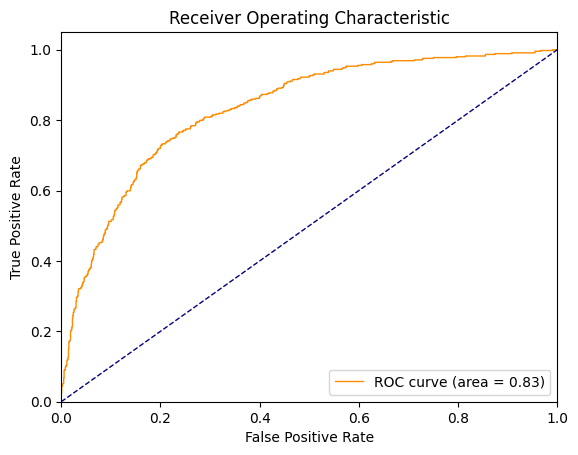

Area Under the Curve (AUC): 0.832731


In [15]:
#perceptron 🧠
ppn_grid = GridSearchCV(ppn_pipeline, param_grid=ppn_param_grid, cv=10, n_jobs=-1)
ppn_grid.fit(X_train, y_train)

ppn = ppn_grid.best_estimator_

print(colored(f'Best PPN: {ppn}', 'blue'))
ppn_roc_auc = plot_auc_curve(ppn)

---

***Explanations and Rationale***

The code snippet focuses on implementing a Logistic Regression model pipeline StandardScaler() and max iterations of 10,000. The model performed best on the normalized version of the training set. Here, and in all the following models, we assign the training and testing sets to a single local variable name to allow us to change which set will be used within the model and update to a single line of code. 

***Explanation of Code***

* `LogisticRegression()`: Initializes the logistic regression model.
  * `max_iter='10000`: Sets the max iterations of the model to 10,000.
* `.fit()`: This is doing the actual "training" of the model. This is how it learns. 🎓

***Notes:***
* `StandardScaler()` standardizes features by removing the mean of the data and scaling to the data's unit variance.

In [39]:
# Define an exhaustive parameter grid
log_param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__C': np.logspace(-4, 4, 200),
    'classifier__solver': ['lbfgs', 'sag', 'saga'],
    'classifier__penalty': ['l2', 'None'],
}

# Define the pipeline
log_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=10000))
])

---

***Explanations and Rationale***

This code snippet focuses on hyperparameter tuning for a logistic regression model using grid search, selecting the best model, and printing information about the best model. It is printing the ROC AUC curve for evaluation.

***Explanation of Code***

* `GridSearchCV()`: A method for performing hyperparameter tuning through an exhaustive search of the specified paramter grid "ppn_grid".
    * `cv='10`: Sets cross validation value to 10 folds.
    * `n_jobs`: Indicates use of all available CPU cores.
* `.fit()`: This is doing the actual "training" of the model. This is how it learns. 🎓
* `.best_estimator`: Returns the best model of the pipeline according to hyperparameter tuning

***Notes***

`warnings.filterwarnings('ignore')` and `warnings.resetwarnings()` are present to accomodate for issues with source control between Kaggle, Jupyter notebook on a localhost, and local coding within VS Code. The plan was to ensure there was the ability for collaborative without compromising on model quality. This is unique to our Logistic Regression Classifier.

The AUC ROC Value is 0.836597.

Best Log: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 LogisticRegression(C=0.049370478528390035, max_iter=10000))])


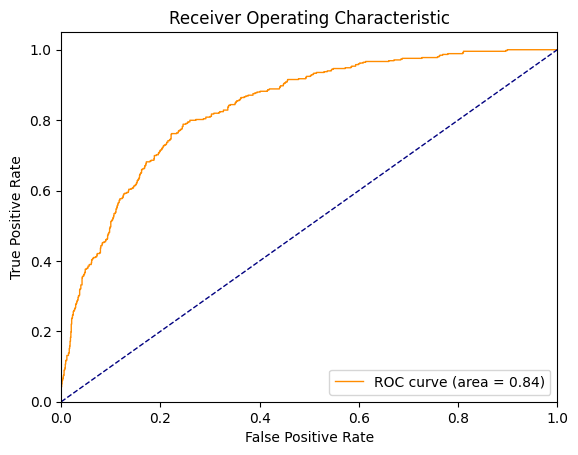

Area Under the Curve (AUC): 0.836597


In [40]:
#Logistic Regression 
warnings.filterwarnings('ignore')
log_grid = GridSearchCV(log_pipeline, param_grid=log_param_grid, cv=10, n_jobs=-1)
log_grid.fit(X_train, y_train)

log = log_grid.best_estimator_

print(colored(f'Best Log: {log}', 'blue'))
log_roc_auc = plot_auc_curve(log)
warnings.resetwarnings()

---

***Explanations and Rationale***

The code snippet focuses on implementing a Decision Tree model utilizing standardized features. The model performed best on the normalized version of the training set. The given grid, or dictionary, allows the code to perform hyperparameter tuning by iterating over various combinations of the given hyperparameters. This will determine the best performing configuration in the Decision Tree model. The "max_depth", "min_samples_split", and "min_samples_leaf" grid values were extended and changed to attempt to improve scores; it was found that the values in the above grid were sufficient and adjusting them higher did not improve output.

***Explanation of Code***

* `classifier__criterion`: Criterion to measure the quality of a split ("gini" or "entropy").
* `classifier__splitter`: The strategy used to choose the split at each node ("best" or "random").
* `classifier__max_depth`: Defined maximum depth of the tree.
* `classifier__min_samples_split`: The minimum number of samples required to split an internal node.
* `classifier__min_samples_leaf`: The minimum number of samples required to be at a leaf node.

***Notes:***

`StandardScaler()` standardizes features by removing the mean of the data and scaling to the data's unit 


In [18]:
# Define the pipeline for Decision Tree
tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

# Define an exhaustive parameter grid for Decision Tree
tree_param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__splitter': ['best', 'random'],
    'classifier__max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

---

***Explanations and Rationale***

This code snippet focuses on hyperparameter tuning for a Decision Tree model using grid search, selecting the best model, and printing information about the best model. It is printing the ROC AUC curve for evaluation.

***Explanation of Code***

* `GridSearchCV()`: A method for performing hyperparameter tuning through an exhaustive search of the specified paramter grid "ppn_grid".
    * `cv='10`: Sets cross validation value to 10 folds.
    * `n_jobs`: Indicates use of all available CPU cores.
* `.fit()`: This is doing the actual "training" of the model. This is how it learns. 🎓
* `.best_estimator`: Returns the best model of the pipeline according to hyperparameter tuning

***Notes***

The Area Under the Curve (AUC) score for this model is 0.813679.

Best Decision Tree: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=7,
                                        min_samples_leaf=2, min_samples_split=5,
                                        splitter='random'))])


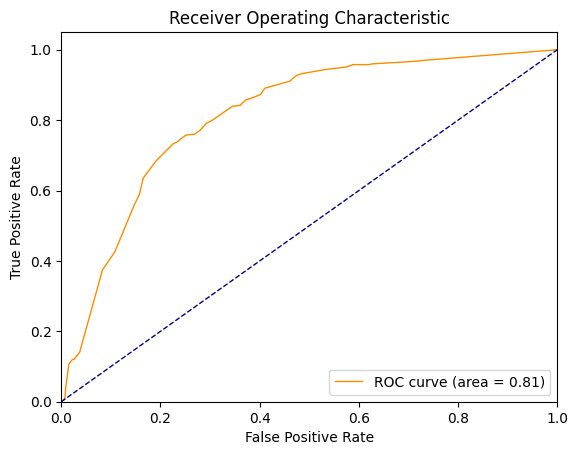

Area Under the Curve (AUC): 0.813679


In [19]:
# Create the Grid Search object for Decision Tree
tree_grid = GridSearchCV(tree_pipeline, param_grid=tree_param_grid, cv=10, n_jobs=-1)
tree_grid.fit(X_train, y_train)

# Get the best estimator
tree = tree_grid.best_estimator_

# Display and plot
print(colored(f'Best Decision Tree: {tree}', 'blue'))
tree_roc_auc = plot_auc_curve(tree)

---
***Explanations and Rationale***

The code snippet focuses on implementing a Random Forest model. The given grid, or dictionary, allows the code to perform hyperparameter tuning by iterating over various combinations of the given hyperparameters. This will determine the best performing configuration in the Decision Tree model. The "max_depth", "min_samples_split", and "min_samples_leaf", and "n_estimators" grid values were extended and changed to attempt to improve scores. The values in "min_samples_split" were changed from {2, 5, 10} to {10, 15, 20} as values in this range appeared to imprive the AUC ROC score. The values in "min_samples_leaf" were changed from {1, 2, 4} to {4, 8, 12} as values in this range all appeared to improve the AUC ROC score as well. The "max_depth" and "n_estimators" values were not changed as testing changes proved to have no postive effect on AUC ROC value.

***Explanation of Code***

* `classifier__n_estimators`: Number of trees in the forest model.
* `classifier__max_depth`: Defined maximum depth of the tree.
* `classifier__min_samples_split`: The minimum number of samples required to split an internal node.
* `classifier__min_samples_leaf`: The minimum number of samples required to be at a leaf node.

***Notes***

There is intentionally no defined scaling of data in the instantiation of the RandomForestClassifier model.


In [20]:
# Define an exhaustive parameter grid
forest_param_grid = {
    'classifier__n_estimators': [50, 100, 200, 300, 400, 500],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [10, 15, 20],
    'classifier__min_samples_leaf': [4, 8, 12]
}

# Define the pipeline
forest_pipeline = Pipeline([
    ('classifier', RandomForestClassifier())
])


---

***Explanations and Rationale***

This code snippet focuses on hyperparameter tuning for a Random Forest model using grid search, selecting the best model, and printing information about the best model. It is printing the ROC AUC curve for evaluation.

***Explanation of Code***

* `GridSearchCV()`: A method for performing hyperparameter tuning through an exhaustive search of the specified paramter grid "ppn_grid".
    * `cv='10`: Sets cross validation value to 10 folds.
    * `n_jobs`: Indicates use of all available CPU cores.
* `.fit()`: This is doing the actual "training" of the model. This is how it learns. 🎓
* `.best_estimator`: Returns the best model of the pipeline according to hyperparameter tuning

***Notes***

The Area Under the Curve (AUC) score for this model is 0.845216.

Best Random Forest: Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=30, min_samples_leaf=8,
                                        min_samples_split=10,
                                        n_estimators=400))])


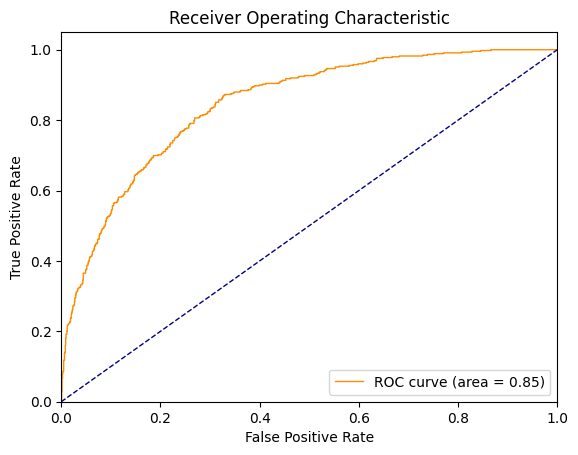

Area Under the Curve (AUC): 0.845216


In [21]:
#Random Forest 🌲
forest_grid = GridSearchCV(forest_pipeline, param_grid=forest_param_grid, cv=10, n_jobs=-1)
forest_grid.fit(X_train, y_train)

forest = forest_grid.best_estimator_

# Display and plot
print(colored(f'Best Random Forest: {forest}', 'blue'))
forest_roc_auc = plot_auc_curve(forest)

---
***Explanations and Rationale***

The code snippet focuses on implementing a Support Vector Machine classifier. There was no hyperparameter tuning as we were unable to run the code as intended. We ran into resource issues. Despite this, we left the grid and pipeline code to demonstrate an attempt at finding the best performing classifier.

***Explanation of Code***

* `scaler`: This key represents the scaling method used for feature scaling. It considers both StandardScaler() and MinMaxScaler().
* `classifier__C`: The regularization parameter in the SVM.
* `classifier__kernel`: The kernel type to be used in the algorithm.
* `classifier__gamma`: The kernel coefficient for 'rbf' and 'poly' kernel types.

***Notes***

This model uses `StandardScaler()` for feature scaling and the SVM classifier with the parameter `probability=True` to enable probability estimates within the classifier.


In [22]:
# Define an exhaustive parameter grid
svm_param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['auto', 'scale']
}

# Define the pipeline
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True))  # Enabling probability estimates for plotting AUC
])

---

***Explanations and Rationale***

This code snippet focuses on hyperparameter tuning for a Support Vector Machine model using grid search, selecting the best model, and printing information about the best model. It is printing the ROC AUC curve for evaluation.

***Explanation of Code***

* `GridSearchCV()`: A method for performing hyperparameter tuning through an exhaustive search of the specified paramter grid "ppn_grid".
    * `cv='10`: Sets cross validation value to 10 folds.
    * `n_jobs`: Indicates use of all available CPU cores.
* `.fit()`: This is doing the actual "training" of the model. This is how it learns. 🎓
* `.best_estimator`: Returns the best model of the pipeline according to hyperparameter tuning

***Notes***

This code is commented out as we had resource issues running it. We chose to leave it out as a contender and do not have a AUC ROC value to report.

In [32]:
# # Support Vector Machine (SVM) 🌐
# svm_grid = GridSearchCV(svm_pipeline, param_grid=svm_param_grid, cv=10, n_jobs=-1)
# svm_grid.fit(X_train, y_train)

# svm = svm_grid.best_estimator_

# # Display and plot
# print(colored(f'Best SVM: {svm}', 'blue'))
# svm_roc_auc = plot_auc_curve(svm)

---
***Explanations and Rationale***

The code snippet focuses on implementing a K Nearest Neighbors model. The given grid, or dictionary, allows the code to perform hyperparameter tuning by iterating over various combinations of the given hyperparameters. This will determine the best performing configuration in the K Nearest Neighbors model. The "n_neighbors" parameter was tuned from {3, 5, 7, 9, 11} from to {35, 36, 37, 38, 39} as the second range of values produced the best scores.

***Explanation of Code***

* `scaler`: This key represents the scaling method used for feature scaling. It considers both StandardScaler() and MinMaxScaler().
* `classifier__n_neighbors`: The number of neighbors to use in the KNN algorithm.
* `classifier__weights`: The weight function used in prediction. We are considering "uniform" and "distance".
* `classifier__algorithm`: The algorithm used to compute the nearest neighbors. We are considering "auto", "ball_tree", "kd_tree", and "brute".

***Notes***

* `StandardScaler()` standardizes features by removing the mean of the data and scaling to the data's unit variance.

In [41]:
knn_param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__n_neighbors': [35, 36, 37, 38, 39],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# 3, 5, 7, 9, 11 (original)

# Define the pipeline
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])  

---

***Explanations and Rationale***

This code snippet focuses on hyperparameter tuning for a KNN model using grid search, selecting the best model, and printing information about the best model. It is printing the ROC AUC curve for evaluation.

***Explanation of Code***

* `GridSearchCV()`: A method for performing hyperparameter tuning through an exhaustive search of the specified paramter grid "ppn_grid".
    * `cv='10`: Sets cross validation value to 10 folds.
    * `n_jobs`: Indicates use of all available CPU cores.
* `.fit()`: This is doing the actual "training" of the model. This is how it learns. 🎓
* `.best_estimator`: Returns the best model of the pipeline according to hyperparameter tuning

***Notes***

The AUC ROC score is 0.826396 for this model.

Best k-NN: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=38))])


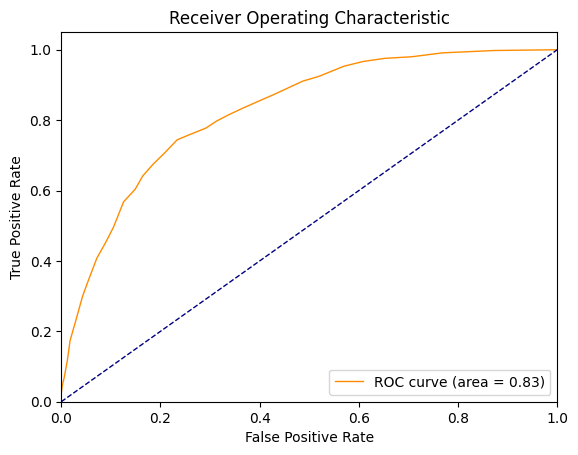

Area Under the Curve (AUC): 0.826396


In [42]:
# k-Nearest Neighbors (k-NN) 🏠
knn_grid = GridSearchCV(knn_pipeline, param_grid=knn_param_grid, cv=10, n_jobs=-1)
knn_grid.fit(X_train, y_train)

knn = knn_grid.best_estimator_

# Display and plot
print(colored(f'Best k-NN: {knn}', 'blue'))
knn_roc_auc = plot_auc_curve(knn)

# 4. **Model Deployment and Submission:** Deploy the selected model on the test dataset and generate predictions. Create a submission file in the required format for evaluation.

In [43]:
#create df of model results

#DF labels
MODEL_TYPES = ['ppn', 'log', 'tree', 'forest', 'knn']
ACCURACY_TYPES = ['ROC-AUC']

# Results
results = [
    [ppn_roc_auc],
    [log_roc_auc],
    [tree_roc_auc],
    [forest_roc_auc],
    [knn_roc_auc],
]

# Create the DataFrame
model_results_df = pd.DataFrame(results, columns=ACCURACY_TYPES, index=MODEL_TYPES)

#display results
print(colored(model_results_df, 'blue'))

         ROC-AUC
ppn     0.832731
log     0.836597
tree    0.813679
forest  0.845216
knn     0.826396


In [45]:
#select best model

#determine which model did best on the test set
optimal_label = model_results_df['ROC-AUC'].idxmax()

model_map = {
    'log': log_grid,
    'tree': tree_grid,
    'forest': forest_grid,
    'knn': knn_grid
}
# Fetch the optimal model based on the label
#optimal_model = model_map.get(optimal_label, None)
optimal_model = model_map.get('knn', None)

best_result = model_results_df.loc[optimal_label, 'ROC-AUC']
    
print(colored(f'Best Model: {optimal_label}', 'green'))
print(colored(f'Result: {best_result}', 'blue'))

Best Model: forest
Result: 0.845216064326164


In [46]:
START_INDEX = 1

test_df = pd.read_csv('/kaggle/input/assignment-data/test.csv')

#Select features
ids = test_df.iloc[:, 0].values
test = test_df.drop(columns=['ID', 'customerID'])

#validate contents
print(colored(f'IDs:\n {ids}', 'blue'))
print(colored(f'\nFeatures:\n {test}', 'green'))

IDs:
 [ 438 2281 2236 ... 3858 4759 5614]

Features:
       gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0       Male              0     Yes        Yes      72          Yes   
1     Female              1      No         No       8          Yes   
2     Female              0     Yes        Yes      41          Yes   
3       Male              0     Yes         No      18          Yes   
4     Female              0     Yes         No      72          Yes   
...      ...            ...     ...        ...     ...          ...   
1404  Female              0     Yes        Yes      49          Yes   
1405    Male              0     Yes        Yes      28          Yes   
1406    Male              0      No         No       5          Yes   
1407  Female              0      No         No      56          Yes   
1408  Female              0     Yes        Yes      72          Yes   

     MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
0            

In [47]:
non_numerics = test['TotalCharges'].apply(lambda x: not check_numeric(str(x).strip())).sum()
print(f"TotalCharges has non-numeric values: {non_numerics}")

# Replace cells with only whitespace in 'TotalCharges' with 0
test['TotalCharges'] = test['TotalCharges'].apply(lambda x: 0 if str(x).strip() == '' else x)

# Check again
non_numerics = test['TotalCharges'].apply(lambda x: not check_numeric(str(x).strip())).sum()
print(f"TotalCharges has non-numeric values: {non_numerics}")

TotalCharges has non-numeric values: 3
TotalCharges has non-numeric values: 0


In [48]:
test_numerical = test.iloc[:, NUMERICAL_FEATURES].values
test_ohe = test.iloc[:, OHE_FEATURES].values 

test_ohe = one_hot_encoder.transform(test_ohe).toarray()
        
test = np.concatenate((test_ohe, test_numerical), axis=1)

print(colored(f'Formatted Shape: {test.shape}', 'blue'))

Formatted Shape: (1409, 30)


In [49]:
#obtain predictions from our unlabeled data
results = optimal_model.predict(test)

#validate results
print(colored(f'Results: {results}', 'blue'))

#Create a .csv file of the predictions and their IDs
submission = pd.DataFrame(list(zip(ids, results)), columns=['ID','Churn'])
submission.to_csv(optimal_label + '_submission_' + str(round(best_result, 4)) + '.csv', index=False)

Results: [0 1 0 ... 0 0 0]


# Chosen Classifier: Log
I would use any classifier that performs well, as implemented in my code. After some hyperparameter tuning discussed above, it was determined that AUC ROC score for the Logistic Regression model was the highest and was chosen over the other models by the chosen metric, AUC ROC. Visually and numerically this model performed as one of the best, so this is the model that we submitted to go over the Kaggle benchmark. Unfortunately we attempted to submit other models, but the result was that the Logistic Regression model had the best score on submission.